# Transformée en z inverse

Les packages utilisés :

In [1]:
import sympy as sp
import numpy as np
from scipy.signal import lfilter
import matplotlib.pyplot as plt
from IPython.display import display

## Calcul symbolique avec sympy

On considère un exemple $H(z)$ de transformée en $z$, avec les pôles sous forme littérale.

In [2]:
zm1, n = sp.symbols('z^{-1}, n')
Z = sp.IndexedBase('Z')
A = sp.IndexedBase('A')
Zn = [(Z[0], 0.9), (Z[1], 0.7), (Z[2], 0.6)]

Les applications numériques pourront être effectuées via la méthode **subs**.

In [3]:
H = 5*(1-0.25*zm1)*(1-3*zm1)/((1-Z[0]*zm1)*(1-Z[1]*zm1)*(1-Z[2]*zm1))
display(H)
display(H.subs(Zn))

(1 - 3*z^{-1})*(5 - 1.25*z^{-1})/((-z^{-1}*Z[0] + 1)*(-z^{-1}*Z[1] + 1)*(-z^{-1}*Z[2] + 1))

(1 - 3*z^{-1})*(5 - 1.25*z^{-1})/((1 - 0.9*z^{-1})*(1 - 0.7*z^{-1})*(1 - 0.6*z^{-1}))

La décomposition en élément simple avec la méthode **apart**, après application numérique, ne fonctionne pas pour l'exemple considéré !

In [4]:
display(H.subs(Zn).apart())

-7.38636363636364*(0.230769230769231*z^{-1}**2 - 1.0*z^{-1} + 0.307692307692308)/(0.171818181818182*z^{-1}**3 - 0.722727272727273*z^{-1}**2 + 1.0*z^{-1} - 0.454545454545455)

Il faut donc effectuer la décomposition avec la forme littérale, puis réaliser l'application numérique a posteriori. On envisage juste le cas où tous les pôles ont un ordre de multiplicité égal à 1.

In [5]:
tz = 0
h = 0
An = []
for k in range(len(Zn)):
    An.append((A[k], (H*(1-zm1*Z[k])).simplify().subs(Zn).subs(zm1, 1/Zn[k][1])))
    tz = tz + A[k]/(1-zm1*Z[k])
    h = h + A[k]*(Z[k]**n)
display(tz)
display(h)
print(An)
print(Zn)

A[2]/(-z^{-1}*Z[2] + 1) + A[1]/(-z^{-1}*Z[1] + 1) + A[0]/(-z^{-1}*Z[0] + 1)

A[0]*Z[0]**n + A[1]*Z[1]**n + A[2]*Z[2]**n

[(A[0], -113.750000000000), (A[1], 258.750000000000), (A[2], -140.000000000000)]
[(Z[0], 0.9), (Z[1], 0.7), (Z[2], 0.6)]


Les coefficients des polynômes en $z^{-1}$ du numérateur $N(z)$ et du dénominateur $D(z)$ sont récupérés sous forme numérique selon les puissances décroissantes de $z^{-1}$.

In [6]:
N = sp.fraction(H)[0]
D = sp.fraction(H)[1].subs(Zn)
coeffD = sp.Poly(D).coeffs()
coeffN = sp.Poly(N).coeffs()

## Calcul numérique avec la fonction **lfilter** de scipy

Les coefficients des polynômes en $z^{-1}$ du numérateur et du dénominateur sont cette fois récupérés selon les puissances croissantes de $z^{-1}$. Il n'est pas nécessaire de réaliser la décomposition en éléments simples et il suffit d'envoyer en entrée une impulsion numérique $\delta(n)$.

In [7]:
N = 25
delta = np.zeros(N)
tn = np.arange(N)
delta[0] = 1

In [8]:
an = np.zeros(len(coeffD))
bn = np.zeros(len(coeffN))
an[len(coeffD)-1::-1] = coeffD
bn[len(coeffN)-1::-1] = coeffN
print(an)
print(bn)

[ 1.    -2.2    1.59  -0.378]
[  5.   -16.25   3.75]


In [9]:
h_scipy = lfilter(bn, an, delta)

## Calcul numérique avec les résultats obtenus avec sympy

L'application numérique s'effectue à partir de l'expression littérale de $h(n)$.

In [10]:
display(h)
h_sympy = np.real(sp.lambdify(n, h.subs(Zn).subs(An), 'numpy')(tn))

A[0]*Z[0]**n + A[1]*Z[1]**n + A[2]*Z[2]**n

## Bilan

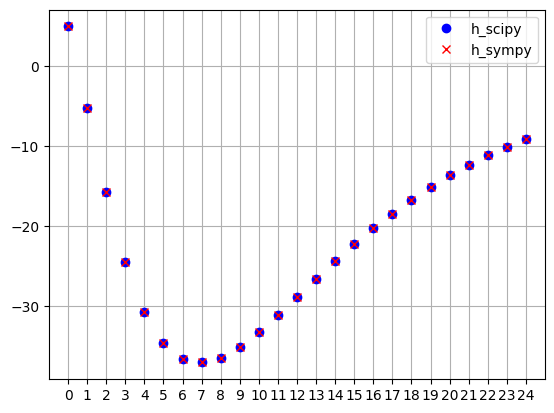

In [11]:
plt.plot(tn, h_scipy, 'bo', label='h_scipy')
plt.plot(tn, h_sympy, 'rx', label='h_sympy')
plt.grid('on')
plt.xlim([-1, N])
plt.xticks(np.arange(N))
plt.legend()
plt.show()